In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from dt_utils import *
from nn_utils import *

C:\Users\11045\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# signal
s1 = pd.read_csv ( "0_raw.csv" )
s2 = pd.read_csv ( "30_raw.csv" )
s3 = pd.read_csv ( "60_raw.csv" )

# bkg
b = pd.read_csv ( "b_raw.csv" )

In [3]:
s1.head()

,b1_E,b1_eta,b1_phi,b1_pt,b2_E,b2_eta,b2_phi,b2_pt,l_E,l_eta,...,v_pt,y1_E,y1_eta,y1_phi,y1_pt,y2_E,y2_eta,y2_phi,y2_pt,isSignal
0,72.741414,0.301684,-0.598666,68.488766,109.935239,1.666824,-3.031406,40.000895,74.045560,-0.041075,...,73.988406,102.988366,0.138095,-1.529853,102.014102,63.447229,0.778576,2.773986,48.112957,1
1,324.774975,-1.413230,-2.675476,149.090656,168.481586,-0.841249,-0.399566,122.113102,302.194694,-1.853767,...,49.680246,270.558750,-1.562757,0.417561,108.625031,103.043824,-0.684514,1.404853,82.861211,1
2,193.482099,-0.579084,-1.414360,162.990563,113.387719,-0.955552,2.389139,75.354586,36.961951,-0.638417,...,4.814607,92.586376,-0.111691,2.659656,92.011859,59.937034,-1.100265,-1.157487,35.914699,1
3,48.361948,-0.421165,-3.119788,43.785070,34.009780,0.526731,-1.925243,29.534006,135.847628,0.876043,...,52.017486,519.302800,1.641037,0.092786,193.976172,84.891497,0.688258,-0.361347,68.112188,1
4,113.701233,-0.420215,-2.277834,103.889289,85.602403,-0.159534,2.905418,84.223484,143.694723,-1.545245,...,91.446929,188.894516,-0.161186,0.068986,186.466969,49.340939,0.253309,1.449799,47.799191,1


In [4]:
s1.columns

Index(['b1_E', 'b1_eta', 'b1_phi', 'b1_pt', 'b2_E', 'b2_eta', 'b2_phi',
       'b2_pt', 'l_E', 'l_eta', 'l_phi', 'l_pt', 'q1_E', 'q1_eta', 'q1_phi',
       'q1_pt', 'q2_E', 'q2_eta', 'q2_phi', 'q2_pt', 'v_E', 'v_eta', 'v_phi',
       'v_pt', 'y1_E', 'y1_eta', 'y1_phi', 'y1_pt', 'y2_E', 'y2_eta', 'y2_phi',
       'y2_pt', 'isSignal'],
      dtype='object')

In [5]:
c0 = ['b1_E', 'b1_eta', 'b1_phi', 'b1_pt', 'b2_E', 'b2_eta', 'b2_phi',
       'b2_pt', 'l_E', 'l_eta', 'l_phi', 'l_pt', 'q1_E', 'q1_eta', 'q1_phi',
       'q1_pt', 'q2_E', 'q2_eta', 'q2_phi', 'q2_pt', 'v_E', 'v_eta', 'v_phi',
       'v_pt', 'y1_E', 'y1_eta', 'y1_phi', 'y1_pt', 'y2_E', 'y2_eta', 'y2_phi',
       'y2_pt']

In [6]:
s1.shape,s2.shape,s3.shape

((38100, 33), (138901, 33), (138005, 33))

In [7]:
b.shape

(11106, 33)

In [8]:
# Keras imports
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout
from sklearn import model_selection , preprocessing

## signal vs. background

In [9]:
def my_model ( num_inputs , num_nodes , extra_depth ):
    # create model
    model = Sequential ()
    model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
    model . add ( Dropout (0.2))
    
    for i in range ( extra_depth ):
        # code up the extra layers here
        model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
        model . add ( Dropout (0.2))
        
    model . add ( Dense (1 , activation ='sigmoid'))
    # Compile model
    model . compile ( loss ='binary_crossentropy' , optimizer = 'adam', metrics =['accuracy'])
    return model

In [10]:
# Set early stop
from keras . callbacks import EarlyStopping , ModelCheckpoint

callbacks_ = [
# if we don ’t have an increase of the accuracy for 15 epochs , terminate training .
EarlyStopping ( verbose = True , patience =15 , monitor ='val_acc' ) ,
# Always make sure that we ’re saving the model weights with the best accuracy .
ModelCheckpoint ('model .h5' , monitor ='val_acc' , verbose =0 , save_best_only = True , mode ='max' )]

Answer_to_all_questions = 42

Using TensorFlow backend.


In [11]:
from sklearn.metrics import confusion_matrix, roc_curve

## CP0 vs background

In [12]:
# sample signal: alpha = 0
S1 = s1.sample(b.shape[0], random_state=42)

# training dataset
train1 = pd.concat([S1,b])

# Shuffle training dataset
train1 = shuffle(train1,random_state=42).reset_index(drop=True)
train1

,b1_E,b1_eta,b1_phi,b1_pt,b2_E,b2_eta,b2_phi,b2_pt,l_E,l_eta,...,v_pt,y1_E,y1_eta,y1_phi,y1_pt,y2_E,y2_eta,y2_phi,y2_pt,isSignal
0,132.736997,-0.609871,-1.463024,110.815859,246.633080,-1.939831,2.745613,69.378273,37.394877,-1.112899,...,103.257154,310.517525,-1.715745,2.172274,108.182078,175.790546,-1.858784,-1.489195,53.498523,0
1,364.893774,1.872181,2.970081,109.575664,84.255225,1.793831,-0.386887,27.258199,226.964559,-1.307090,...,38.634093,98.882694,-0.988896,0.870928,64.623898,50.032459,0.191539,-2.470428,49.128504,0
2,79.282197,0.171509,2.456722,77.328781,48.250670,0.038036,0.108305,47.582852,355.603504,1.633389,...,71.793734,103.449644,0.062441,1.192180,103.248305,121.501450,1.356279,-2.454304,58.705703,0
3,77.472226,0.704273,-1.373354,61.253020,59.606468,-0.375026,1.101116,55.183047,83.227529,-0.132635,...,63.542676,135.616847,0.020566,1.460354,135.588172,58.010096,0.975011,-2.500511,38.310918,0
4,432.618102,-0.674741,1.687749,349.547844,121.518713,-0.208287,-1.609123,118.451086,139.359383,-0.916138,...,18.701764,144.777422,-0.849210,-1.016124,104.700594,46.726052,0.581534,0.171662,39.803777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,129.531026,-0.807164,1.433119,96.212383,30.224470,0.345318,-2.160728,28.284900,84.752191,-0.674471,...,43.299827,160.308702,-1.163301,-1.025964,91.267672,61.143737,-0.250201,1.865960,59.278602,0
22208,85.141599,0.410484,-0.153539,77.779188,46.351764,-1.204555,-0.763998,25.380713,16.786577,-0.114362,...,30.819844,35.669460,0.535167,1.143044,31.107480,35.785370,-0.883901,-2.346415,25.258852,0
22209,86.700399,-0.930914,0.875159,59.017250,247.942905,-2.218371,-0.779451,53.275180,124.778303,-0.652303,...,57.343920,90.884626,-0.488600,-1.679152,81.019766,123.689904,-1.922566,2.678084,35.417324,1
22210,417.542460,-2.472798,1.495897,69.932547,248.963662,2.033421,-1.113195,64.020820,58.060794,-0.842121,...,27.631945,83.229445,0.304601,0.024879,79.512188,94.150030,1.656119,3.076162,34.678879,1


In [13]:
# Standardize
sc1 = preprocessing . StandardScaler ()
input_data1 = sc1 . fit_transform ( train1[c0[0:32]] )
target1 = train1['isSignal']

# train - test split of dataset
train_data1 , test_data1 , train_target1 , test_target1 = model_selection . train_test_split (\
input_data1 , target1 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data1 . shape , train_target1 . shape , test_data1 . shape , test_target1 . shape )

(15548, 32) (15548,) (6664, 32) (6664,)


In [14]:
# train
model1 = my_model(32,100,2)
history1 =  model1. fit ( train_data1 , train_target1 , batch_size = 300 , epochs = 300 , verbose =1 , validation_data =( test_data1 , test_target1 ) , callbacks = callbacks_ )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - 0s 32us/sample - loss: 0.6637 - acc: 0.5987 - val_loss: 0.6370 - val_acc: 0.6289
Epoch 2/300
15548/15548 [==============================] - 0s 15us/sample - loss: 0.6302 - acc: 0.6421 - val_loss: 0.6251 - val_acc: 0.6528
Epoch 3/300
15548/15548 [==============================] - 0s 15us/sample - loss: 0.6202 - acc: 0.6573 - val_loss: 0.6203 - val_acc: 0.6612
Epoch 4/300
15548/15548 [==============================] - 0s 12us/sample - loss: 0.6141 - acc: 0.6634 - val_loss: 0.6183 - val_acc: 0.6588
Epoch 5/300
15548/15548 [==============================] - 0s

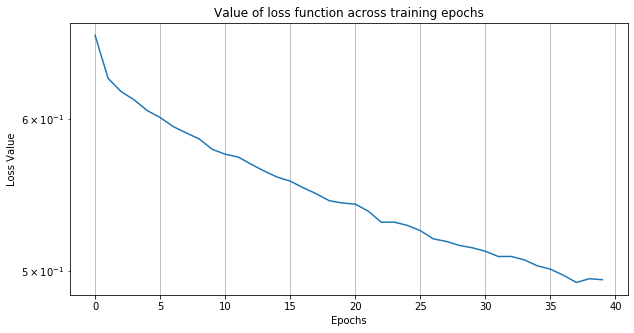

In [15]:
# Loss
lossplot(history1.history['loss'], scale='log');

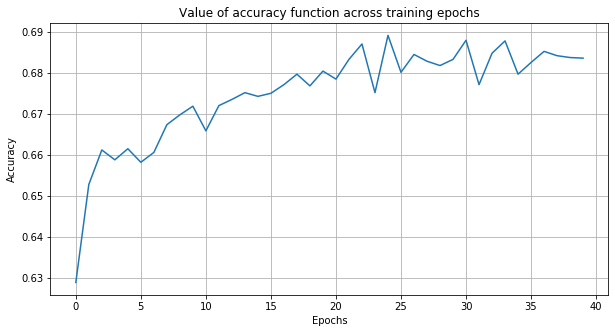

In [16]:
# Accuracy
accplot(history1.history['val_acc'], scale='linear')

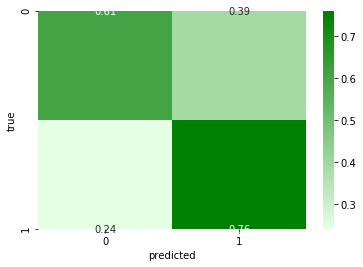

In [17]:
# Predictions
pred1 = model1.predict(test_data1)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred1:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target1.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

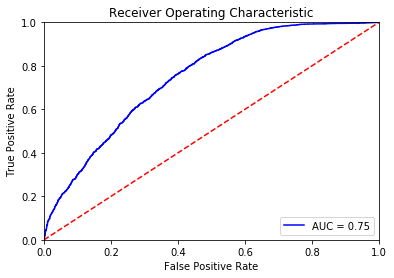

In [18]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target1, pred1)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP30 vs background

In [19]:
# sample signal: alpha = 30
S2 = s2.sample(b.shape[0], random_state=42)

# training dataset
train2 = pd.concat([S2,b])

# Shuffle training dataset
train2 = shuffle(train2,random_state=42).reset_index(drop=True)
train2

,b1_E,b1_eta,b1_phi,b1_pt,b2_E,b2_eta,b2_phi,b2_pt,l_E,l_eta,...,v_pt,y1_E,y1_eta,y1_phi,y1_pt,y2_E,y2_eta,y2_phi,y2_pt,isSignal
0,132.736997,-0.609871,-1.463024,110.815859,246.633080,-1.939831,2.745613,69.378273,37.394877,-1.112899,...,103.257154,310.517525,-1.715745,2.172274,108.182078,175.790546,-1.858784,-1.489195,53.498523,0
1,364.893774,1.872181,2.970081,109.575664,84.255225,1.793831,-0.386887,27.258199,226.964559,-1.307090,...,38.634093,98.882694,-0.988896,0.870928,64.623898,50.032459,0.191539,-2.470428,49.128504,0
2,79.282197,0.171509,2.456722,77.328781,48.250670,0.038036,0.108305,47.582852,355.603504,1.633389,...,71.793734,103.449644,0.062441,1.192180,103.248305,121.501450,1.356279,-2.454304,58.705703,0
3,77.472226,0.704273,-1.373354,61.253020,59.606468,-0.375026,1.101116,55.183047,83.227529,-0.132635,...,63.542676,135.616847,0.020566,1.460354,135.588172,58.010096,0.975011,-2.500511,38.310918,0
4,147.248974,0.793082,-1.283565,110.137828,90.419290,-0.333846,-2.772494,84.869703,82.063981,2.495936,...,52.383957,58.658452,-0.043197,0.529383,58.603766,172.480902,1.795131,0.982727,55.761609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,129.531026,-0.807164,1.433119,96.212383,30.224470,0.345318,-2.160728,28.284900,84.752191,-0.674471,...,43.299827,160.308702,-1.163301,-1.025964,91.267672,61.143737,-0.250201,1.865960,59.278602,0
22208,85.141599,0.410484,-0.153539,77.779188,46.351764,-1.204555,-0.763998,25.380713,16.786577,-0.114362,...,30.819844,35.669460,0.535167,1.143044,31.107480,35.785370,-0.883901,-2.346415,25.258852,0
22209,67.165057,0.740692,-2.741274,51.823949,98.627122,1.691992,0.646770,35.042875,42.224973,-0.133868,...,56.236399,151.806692,0.942312,-0.308005,102.723625,99.861199,1.763834,-2.864912,33.252988,1
22210,58.790108,0.272849,2.369912,55.672387,171.902522,-1.970145,1.006234,47.011543,94.884405,-1.059606,...,108.384711,81.511388,-0.200120,0.681287,79.906008,75.354824,0.287816,-1.091146,72.337914,1


In [20]:
# Standardize
sc2 = preprocessing . StandardScaler ()
input_data2 = sc2 . fit_transform ( train2[c0[0:32]] )
target2 = train2['isSignal']

# train - test split of dataset
train_data2 , test_data2 , train_target2 , test_target2 = model_selection . train_test_split (\
input_data2 , target2 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data2 . shape , train_target2 . shape , test_data2 . shape , test_target2 . shape )

(15548, 32) (15548,) (6664, 32) (6664,)


In [41]:
# train
model2 = my_model(32,100,2)
history2 =  model2. fit ( train_data2 , train_target2 , batch_size = 300 , epochs = 300 , verbose =1 , validation_data =( test_data2 , test_target2 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - ETA: 7s - loss: 0.6968 - acc: 0.436 - ETA: 0s - loss: 0.6911 - acc: 0.532 - ETA: 0s - loss: 0.6801 - acc: 0.566 - 0s 27us/sample - loss: 0.6669 - acc: 0.5888 - val_loss: 0.6369 - val_acc: 0.6276
Epoch 2/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6554 - acc: 0.633 - ETA: 0s - loss: 0.6339 - acc: 0.642 - ETA: 0s - loss: 0.6311 - acc: 0.640 - 0s 13us/sample - loss: 0.6313 - acc: 0.6407 - val_loss: 0.6245 - val_acc: 0.6402
Epoch 3/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6149 - acc: 0.656 - ETA: 0s - loss: 0.6218 - acc: 0.656 - ETA: 0s - loss: 0.6218 - acc: 0.656 - ETA: 0s - loss: 0.6202 - acc: 0.656 - 0s 15us/sample - loss: 0.6213 - acc: 0.6555 - val_loss: 0.6224 - val_acc: 0.6459
Epoch 4/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6195 - acc: 0.620 - ETA: 0s - loss: 0.6116 - acc: 0.659 - ETA: 0s - loss: 

Epoch 31/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5245 - acc: 0.716 - ETA: 0s - loss: 0.5193 - acc: 0.731 - ETA: 0s - loss: 0.5174 - acc: 0.733 - 0s 12us/sample - loss: 0.5210 - acc: 0.7291 - val_loss: 0.5710 - val_acc: 0.6768
Epoch 32/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5203 - acc: 0.696 - ETA: 0s - loss: 0.5107 - acc: 0.731 - ETA: 0s - loss: 0.5194 - acc: 0.728 - 0s 13us/sample - loss: 0.5188 - acc: 0.7292 - val_loss: 0.5696 - val_acc: 0.6814
Epoch 33/300
15548/15548 [==============================] - ETA: 0s - loss: 0.4851 - acc: 0.746 - ETA: 0s - loss: 0.5158 - acc: 0.736 - ETA: 0s - loss: 0.5140 - acc: 0.730 - 0s 11us/sample - loss: 0.5189 - acc: 0.7288 - val_loss: 0.5706 - val_acc: 0.6850
Epoch 34/300
15548/15548 [==============================] - ETA: 0s - loss: 0.4954 - acc: 0.766 - ETA: 0s - loss: 0.5116 - acc: 0.737 - ETA: 0s - loss: 0.5130 - acc: 0.735 - 0s 11us/sample - loss: 0.5156 - acc: 0.7320 - val_loss: 0.567

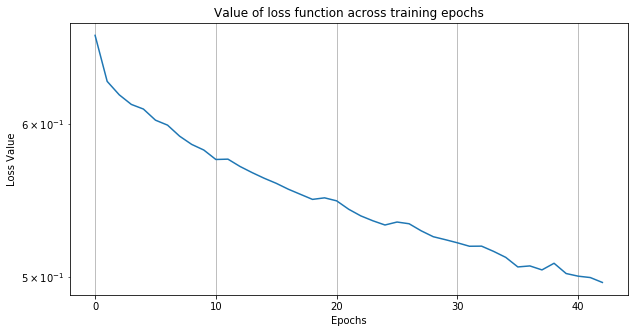

In [42]:
# Loss
lossplot(history2.history['loss'], scale='log');

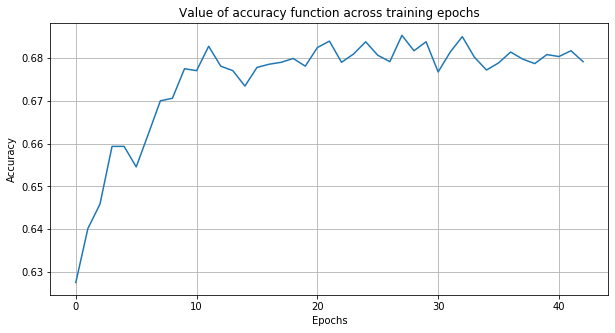

In [43]:
# Accuracy
accplot(history2.history['val_acc'], scale='linear')

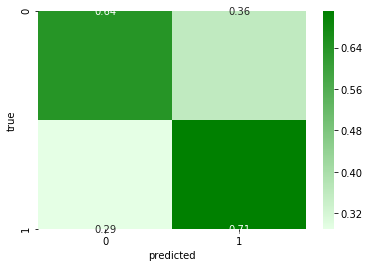

In [44]:
# Predictions
pred2 = model2.predict(test_data2)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred2:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target2.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

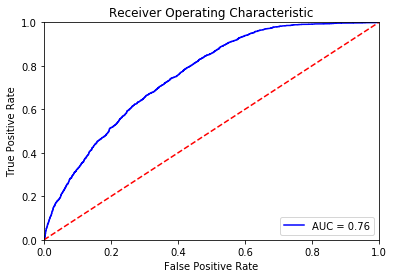

In [45]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target2, pred2)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP60 vs. background

In [26]:
# sample signal: alpha = 30
S3 = s3.sample(b.shape[0], random_state=42)

# training dataset
train3 = pd.concat([S3,b])

# Shuffle training dataset
train3 = shuffle(train3,random_state=42).reset_index(drop=True)

In [27]:
# Standardize
sc3 = preprocessing . StandardScaler ()
input_data3 = sc3 . fit_transform ( train3[c0[0:32]] )
target3 = train3['isSignal']

# train - test split of dataset
train_data3 , test_data3 , train_target3 , test_target3 = model_selection . train_test_split (\
input_data3 , target3 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data3 . shape , train_target3 . shape , test_data3 . shape , test_target3 . shape )

(15548, 32) (15548,) (6664, 32) (6664,)


In [71]:
# train
model3 = my_model(32,200,2)
history3 =  model3. fit ( train_data3 , train_target3 , batch_size = 100 , epochs = 100 , verbose =1 , validation_data =( test_data3 , test_target3 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/100
15548/15548 [==============================] - ETA: 23s - loss: 0.6944 - acc: 0.50 - ETA: 2s - loss: 0.6765 - acc: 0.5640 - ETA: 1s - loss: 0.6569 - acc: 0.604 - ETA: 0s - loss: 0.6504 - acc: 0.616 - ETA: 0s - loss: 0.6369 - acc: 0.632 - ETA: 0s - loss: 0.6274 - acc: 0.640 - ETA: 0s - loss: 0.6238 - acc: 0.643 - ETA: 0s - loss: 0.6192 - acc: 0.647 - ETA: 0s - loss: 0.6167 - acc: 0.651 - ETA: 0s - loss: 0.6140 - acc: 0.654 - 1s 62us/sample - loss: 0.6118 - acc: 0.6568 - val_loss: 0.5953 - val_acc: 0.6640
Epoch 2/100
15548/15548 [==============================] - ETA: 0s - loss: 0.6589 - acc: 0.600 - ETA: 0s - loss: 0.5825 - acc: 0.674 - ETA: 0s - loss: 0.5820 - acc: 0.688 - ETA: 0s - loss: 0.5825 - acc: 0.689 - ETA: 0s - loss: 0.5849 - acc: 0.686 - ETA: 0s - loss: 0.5857 - acc: 0.685 - ETA: 0s - loss: 0.5858 - acc: 0.682 - ETA: 0s - loss: 0.5854 - acc: 0.683 - ETA: 0s - loss: 0.5838 - acc: 0.685 - 1s 40us/sample - loss: 0.5847

15548/15548 [==============================] - ETA: 0s - loss: 0.5309 - acc: 0.700 - ETA: 0s - loss: 0.4924 - acc: 0.746 - ETA: 0s - loss: 0.4858 - acc: 0.752 - ETA: 0s - loss: 0.4926 - acc: 0.747 - ETA: 0s - loss: 0.4994 - acc: 0.748 - ETA: 0s - loss: 0.5005 - acc: 0.745 - ETA: 0s - loss: 0.4980 - acc: 0.744 - ETA: 0s - loss: 0.4966 - acc: 0.744 - ETA: 0s - loss: 0.4957 - acc: 0.743 - ETA: 0s - loss: 0.4963 - acc: 0.743 - 1s 41us/sample - loss: 0.4951 - acc: 0.7440 - val_loss: 0.5713 - val_acc: 0.6924
Epoch 17/100
15548/15548 [==============================] - ETA: 0s - loss: 0.4364 - acc: 0.800 - ETA: 0s - loss: 0.4599 - acc: 0.747 - ETA: 0s - loss: 0.4704 - acc: 0.746 - ETA: 0s - loss: 0.4689 - acc: 0.752 - ETA: 0s - loss: 0.4759 - acc: 0.747 - ETA: 0s - loss: 0.4774 - acc: 0.748 - ETA: 0s - loss: 0.4809 - acc: 0.748 - ETA: 0s - loss: 0.4835 - acc: 0.747 - ETA: 0s - loss: 0.4861 - acc: 0.745 - ETA: 0s - loss: 0.4848 - acc: 0.747 - ETA: 0s - loss: 0.4867 - acc: 0.747 - 1s 43us/sample

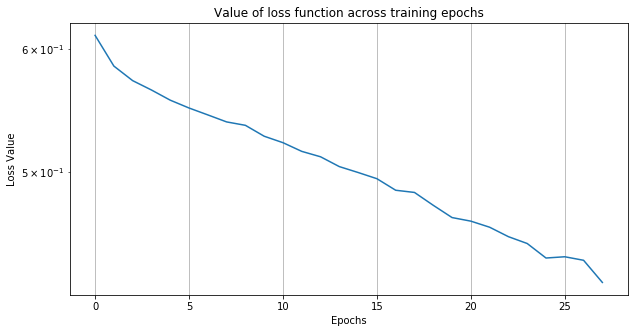

In [72]:
# Loss
lossplot(history3.history['loss'], scale='log');

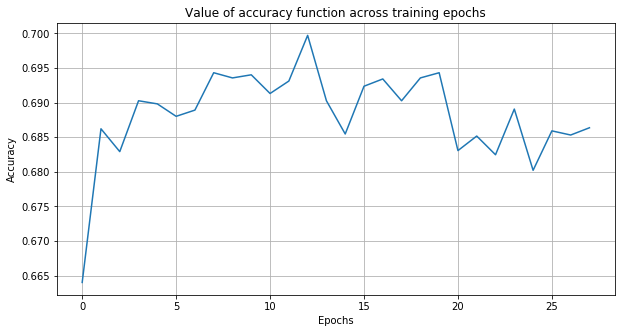

In [73]:
# Accuracy
accplot(history3.history['val_acc'], scale='linear')

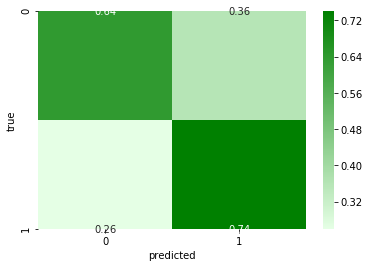

In [74]:
# Predictions
pred3 = model3.predict(test_data3)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred3:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target3.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

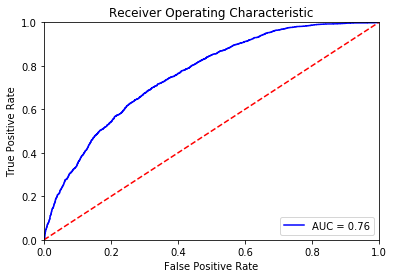

In [75]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target3, pred3)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP0, 30 and 60

In [33]:
# ML imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Custom imports
import daml
from daml import plot, utilities, optimisation

In [34]:
s1.shape, s2.shape, s3.shape

((38100, 33), (138901, 33), (138005, 33))

In [35]:
cp0 = s1
cp0.insert(33,'alpha',0)
cp30 = s2.sample(s1.shape[0], random_state=42)
cp30.insert(33,'alpha',1)
cp60 = s3.sample(s1.shape[0], random_state=42)
cp60.insert(33,'alpha',2)

In [36]:
# training dataset
train4 = pd.concat([cp0,cp30,cp60])

# Shuffle training dataset
train4 = shuffle(train4,random_state=42).reset_index(drop=True)

# Standardize
sc4 = preprocessing . StandardScaler ()
input_data4 = sc4 . fit_transform ( train4[c0[0:32]] )
target4 = train4['alpha']

# train - test split of dataset
train_data4 , test_data4 , train_target4 , test_target4 = model_selection . train_test_split (\
input_data4 , target4 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data4 . shape , train_target4 . shape , test_data4 . shape , test_target4 . shape )

(80010, 32) (80010,) (34290, 32) (34290,)


In [88]:
def smallmodel (name):
    # Create a NW
    input_tensor = Input(shape=(32,))
    H1 = Dense(30, activation='relu')(input_tensor)
    output_tensor = Dense(3, activation='softmax')(H1)
    model = Model(input_tensor, output_tensor,name = name)
    # Compile the model
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# Get the model
model4 = smallmodel('Small model (standard)')
model4.summary()

Model: "Small model (standard)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 30)                990       
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 93        
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compile and fit
cp = model4.fit(train_data4,train_target4,batch_size=300,epochs=300,validation_split=0.3,shuffle=True,verbose=2, callbacks = callbacks_)

Train on 56007 samples, validate on 24003 samples
Epoch 1/300
56007/56007 - 1s - loss: 1.1533 - acc: 0.3435 - val_loss: 1.1115 - val_acc: 0.3515
Epoch 2/300
56007/56007 - 0s - loss: 1.1016 - acc: 0.3646 - val_loss: 1.0997 - val_acc: 0.3662
Epoch 3/300
56007/56007 - 0s - loss: 1.0934 - acc: 0.3742 - val_loss: 1.0951 - val_acc: 0.3720
Epoch 4/300
56007/56007 - 0s - loss: 1.0885 - acc: 0.3831 - val_loss: 1.0925 - val_acc: 0.3766
Epoch 5/300
56007/56007 - 0s - loss: 1.0859 - acc: 0.3905 - val_loss: 1.0905 - val_acc: 0.3821
Epoch 6/300
56007/56007 - 0s - loss: 1.0835 - acc: 0.3933 - val_loss: 1.0895 - val_acc: 0.3856
Epoch 7/300
56007/56007 - 0s - loss: 1.0818 - acc: 0.3956 - val_loss: 1.0886 - val_acc: 0.3842
Epoch 8/300
56007/56007 - 0s - loss: 1.0805 - acc: 0.3983 - val_loss: 1.0880 - val_acc: 0.3876
Epoch 9/300
56007/56007 - 0s - loss: 1.0794 - acc: 0.4006 - val_loss: 1.0869 - val_acc: 0.3885
Epoch 10/300
56007/56007 - 0s - loss: 1.0787 - acc: 0.4031 - val_loss: 1.0870 - val_acc: 0.3889

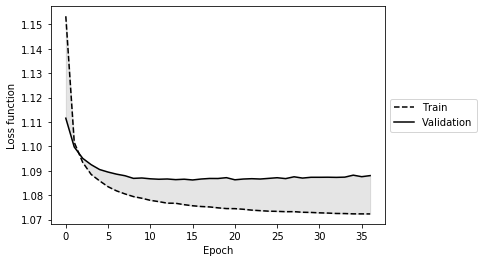

In [90]:
# Plot loss curves
daml.plot.loss(cp);

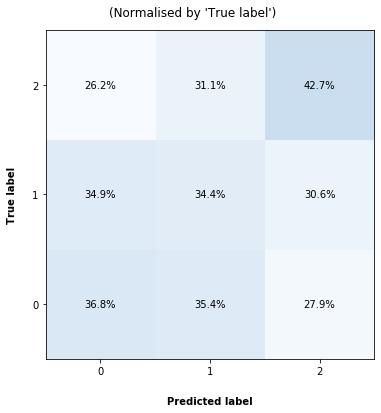

In [91]:
# Get predictions of X_test without weight
pred4 = model4.predict(test_data4)
pred4 = np.asarray([np.argmax(i) for i in pred4])
cm = confusion_matrix(pred4,test_target4)
daml.plot.confusion_matrix (cm, labels=None, normalise=True);